In [1]:
#Importing the libraries..
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn import tree
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
Trade = pd.read_csv("Trades_Calculation_0m-3m.csv",low_memory=False)
print(Trade)

      Symbol PositionType  Size  EntryDate  ExitDate     EntryTime  \
0       EBAY         Long  1000   20190301  20190301  09:30:09.163   
1       FNKO        Short -1000   20190301  20190301  09:30:32.123   
2       EBAY        Short -1000   20190301  20190301  09:31:14.277   
3       EBAY        Short -1000   20190301  20190301  09:31:22.502   
4       EBAY        Short -1000   20190301  20190301  09:30:30.164   
...      ...          ...   ...        ...       ...           ...   
15212    BUD        Short -1000   20190531  20190531  09:45:36.870   
15213   USAT         Long  1000   20190531  20190531  10:08:29.390   
15214    PFG         Long  1000   20190531  20190531  10:08:44.160   
15215   PPDF         Long  1000   20190531  20190531  10:05:57.226   
15216     TS        Short -1000   20190531  20190531  10:08:50.458   

           ExitTime         TradeTime  EntryPrice  ExitPrice  ...    GP  \
0      09:30:28.597  00:00:19.4337180       38.52     38.484  ...  GpUp   
1      09

In [3]:
X = Trade[['EntrySeconds','EntryPrice','Float','Vol1MinRatioMaxPD123','Vol1MinRatioMaxPD123_TotalVolume','AllExchangesVolume','IntradayCurrentMarketGapPerc','Fund52WeekChange','FundShortRatio','FundShortPercofFloat']]
Y1 = Trade[['WinTrade','PercentageProfit']]
Trade.head()

,Symbol,PositionType,Size,EntryDate,ExitDate,EntryTime,ExitTime,TradeTime,EntryPrice,ExitPrice,...,GP,IH_PH,IL_PL,PreMarketHigh_BA_Delta,PreMarketLow_BA_Delta,PH_ba,PL_ba,DollerPerShare,Max_AllExchangesVolume_ADV_3D_Ratio,IntradayOpenCurrentGapDifPerc
0,EBAY,Long,1000,20190301,20190301,09:30:09.163,09:30:28.597,00:00:19.4337180,38.52,38.484,...,GpUp,IH,PL,1.058824,67.764706,PHu10,PLumx,-18,7.4,0.026918
1,FNKO,Short,-1000,20190301,20190301,09:30:32.123,09:32:31.350,00:01:59.2271070,23.22,23.052,...,GpUp,PH,IL,-10.336283,2.619469,PHdmx,PLu10,84,81.6,-0.100553
2,EBAY,Short,-1000,20190301,20190301,09:31:14.277,09:32:59.311,00:01:45.0339850,38.35,38.596,...,GpUp,IH,PL,-7.583643,56.118959,PHd10,PLumx,-123,10.4,0.026918
3,EBAY,Short,-1000,20190301,20190301,09:31:22.502,09:32:59.311,00:01:36.8088880,38.33,38.686,...,GpUp,IH,PL,-8.729730,55.972973,PHd10,PLumx,-178,10.6,0.026918
4,EBAY,Short,-1000,20190301,20190301,09:30:30.164,09:32:59.311,00:02:29.1470660,38.37,38.604,...,GpUp,IH,PL,-5.918699,51.447154,PHd10,PLumx,-117,8.8,0.026918


In [4]:
list(Trade.columns[Trade.isnull().any()])
Trade.isnull().sum()

Symbol                                 0
PositionType                           0
Size                                   0
EntryDate                              0
ExitDate                               0
                                      ..
PH_ba                                  0
PL_ba                                  0
DollerPerShare                         0
Max_AllExchangesVolume_ADV_3D_Ratio    0
IntradayOpenCurrentGapDifPerc          0
Length: 188, dtype: int64

In [5]:
def FilterDataFrame(EntrySeconds):
    Maximum = Trade['EntrySeconds'].max()
    Minimum = Trade['EntrySeconds'].min()
    Unique = Trade['EntrySeconds'].unique()
    Average = Trade['EntrySeconds'].mean()
    Mode = Trade['EntrySeconds'].mode()
    Median = Trade['EntrySeconds'].median()
    Count = Trade['EntrySeconds'].count()
    
    
    print("Maximum = ",Maximum,"\n","Minimum = ",Minimum,"\n","Unique = ",Unique,"\n","Average = ",Average,"\n",
         "Mode = ", Mode,"\n","Median = ",Median,"\n", "Count = ",Count)
    
    
FilterDataFrame('EntrySeconds')

Maximum =  2397.5029999999997 
 Minimum =  0.14400000000000002 
 Unique =  [   9.163   32.123   74.277 ... 2324.16  2157.226 2330.458] 
 Average =  727.5017204442428 
 Mode =  0     80.179
1    122.220
2    562.282
dtype: float64 
 Median =  593.425 
 Count =  15217


In [6]:
def FilterDataFrame(Float):
    Maximum=Trade['Float'].max()
    Minimum=Trade['Float'].min()
    Unique = Trade['Float'].unique()
    Average = Trade['Float'].mean()
    Mode = Trade['Float'].mode()
    Median = Trade['Float'].median()
    Count = Trade['Float'].count()
    
    
    print("Maximum = ",Maximum,"\n","Minimum = ",Minimum,"\n","Unique = ",Unique,"\n","Average = ",Average,"\n",
         "Mode = ", Mode,"\n","Median = ",Median,"\n", "Count = ",Count)
    
FilterDataFrame('Float')

Maximum =  4350000000 
 Minimum =  22610 
 Unique =  [823380000  11730000 263610000 ...  93630000  11720000 277450000] 
 Average =  225251250.96273905 
 Mode =  0    80520000
dtype: int64 
 Median =  77850000.0 
 Count =  15217


In [7]:
def FilterDataFrame(EntryPrice):
    Maximum=Trade['EntryPrice'].max()
    Minimum=Trade['EntryPrice'].min()
    Unique = Trade['EntryPrice'].unique()
    Average = Trade['EntryPrice'].mean()
    Mode = Trade['EntryPrice'].mode()
    Median = Trade['EntryPrice'].median()
    Count = Trade['EntryPrice'].count()
    print("Maximum = ",Maximum,"\n","Minimum = ",Minimum,"\n","Unique = ",Unique,"\n","Average = ",Average,"\n",
         "Mode = ", Mode,"\n","Median = ",Median,"\n", "Count = ",Count)
    
FilterDataFrame('EntryPrice')

Maximum =  673.0 
 Minimum =  1.0 
 Unique =  [38.52 23.22 38.35 ... 16.92 80.28 80.1 ] 
 Average =  50.064635604915736 
 Mode =  0    2.85
1    3.90
dtype: float64 
 Median =  30.98 
 Count =  15217


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6B0DCDC88>,
      dtype=object)

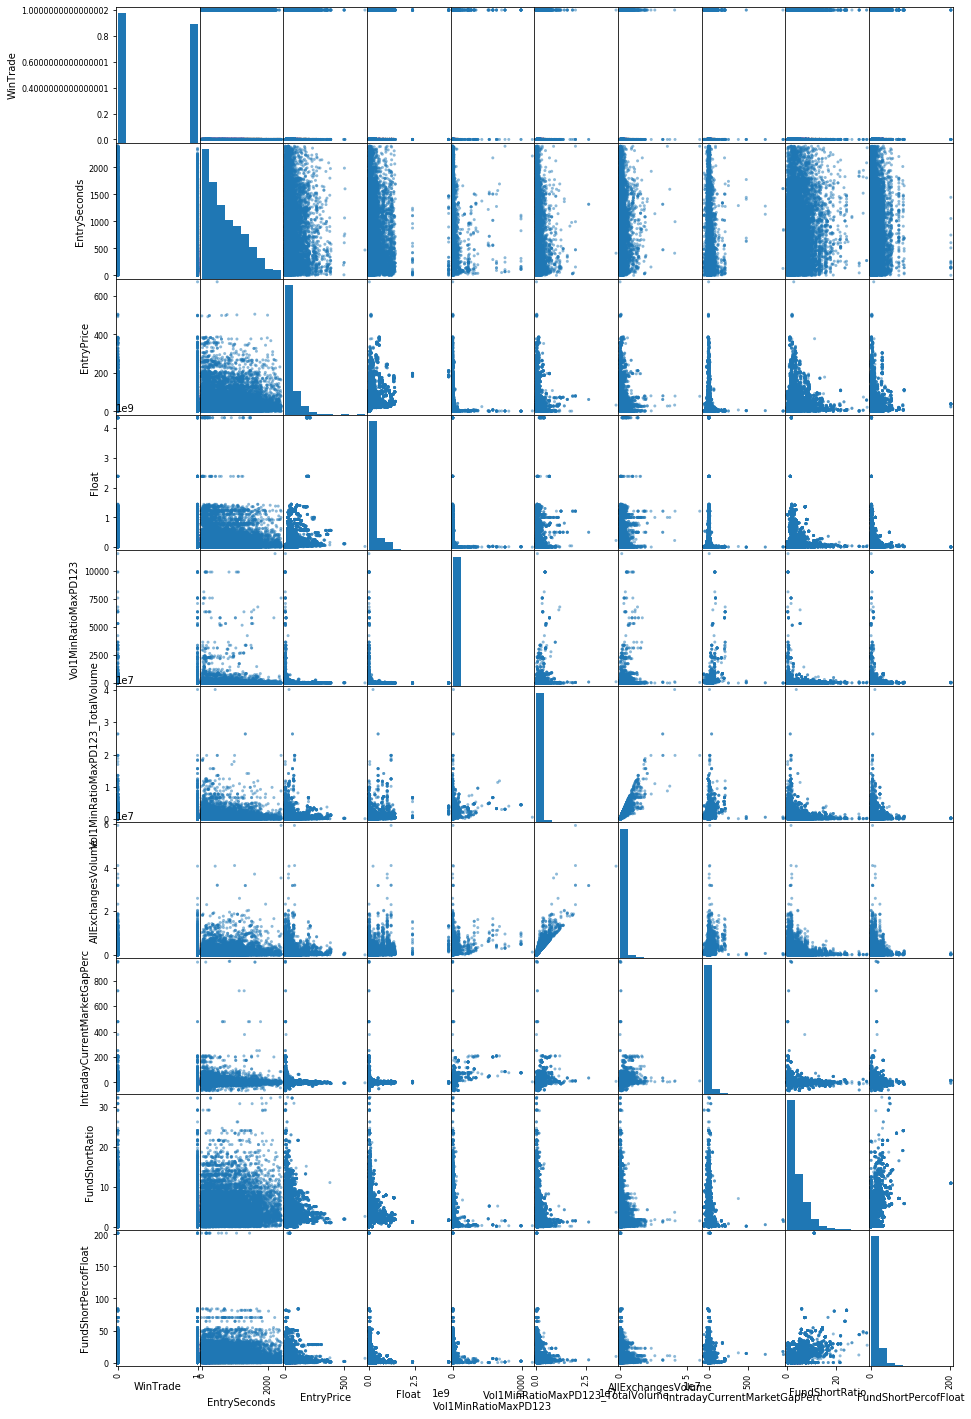

In [8]:
Independent_variables =['EntrySeconds','EntryPrice','Float','Vol1MinRatioMaxPD123','Vol1MinRatioMaxPD123_TotalVolume','AllExchangesVolume','IntradayCurrentMarketGapPerc','Fund52WeekChange','FundShortRatio','FundShortPercofFloat']

Dependent_variables =['WinTrade','PercentageProfit']

Attributes =['WinTrade','EntrySeconds','EntryPrice','Float','Vol1MinRatioMaxPD123','Vol1MinRatioMaxPD123_TotalVolume','AllExchangesVolume','IntradayCurrentMarketGapPerc','Fund52WeekChange','FundShortRatio','FundShortPercofFloat']

from pandas.plotting import scatter_matrix

scatter_matrix(Trade[Attributes], figsize= [15,25])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6B2B51518>,
      dtype=object)

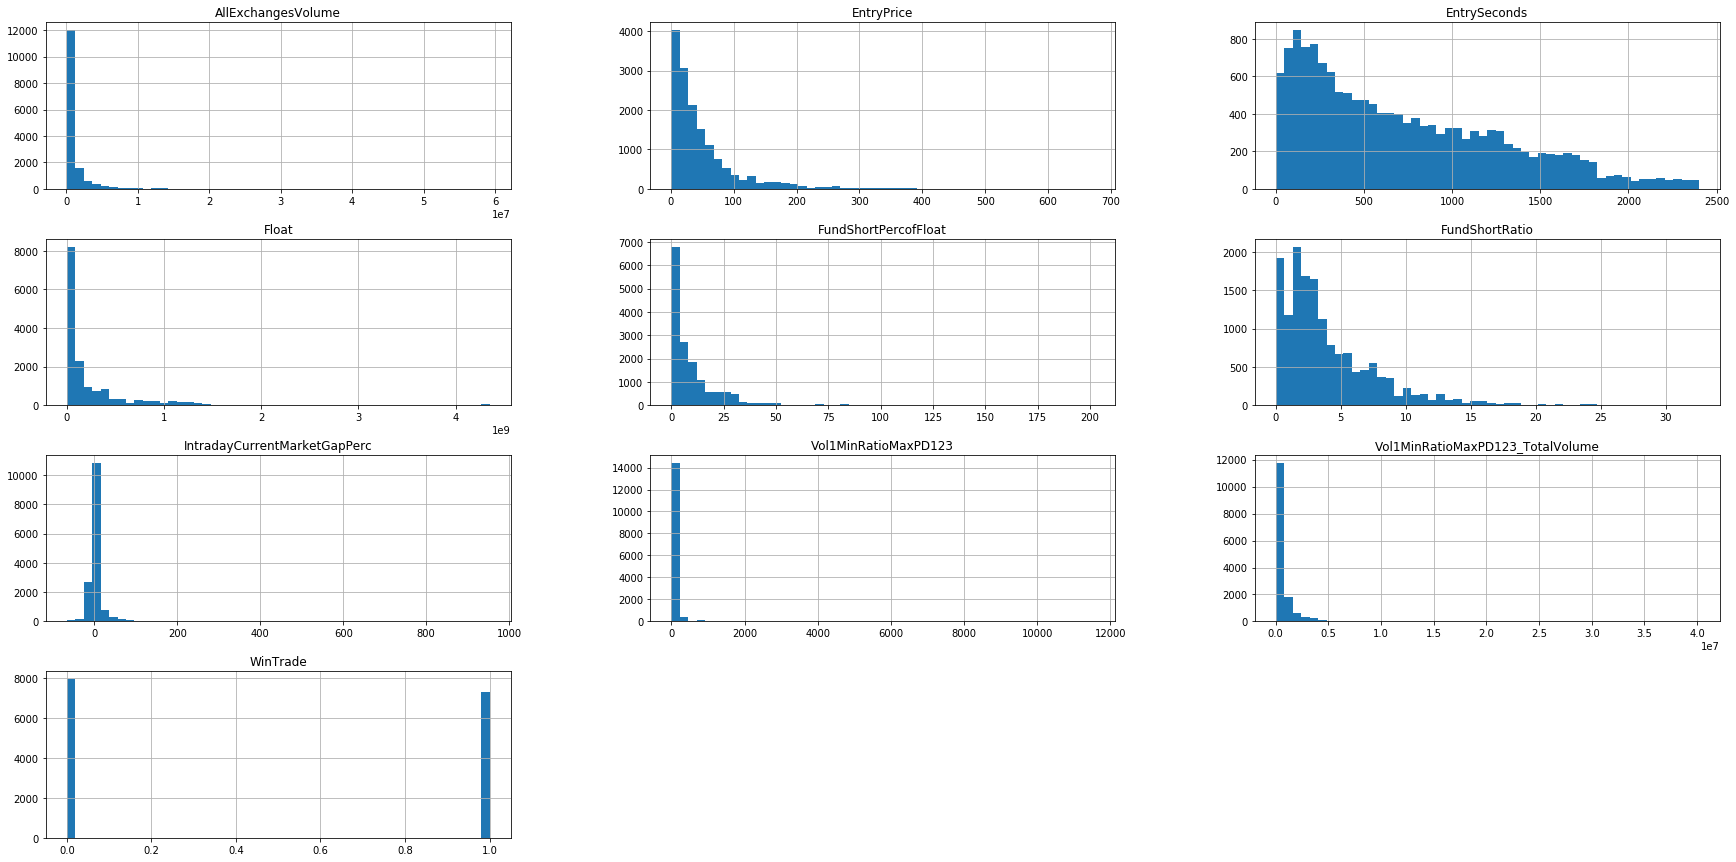

In [9]:
Trade[Attributes].hist(bins=50, figsize=(30,15))

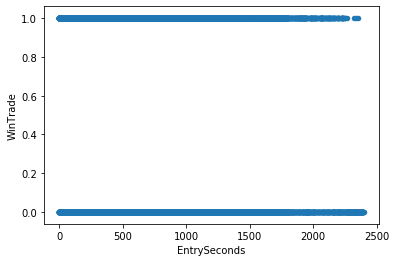

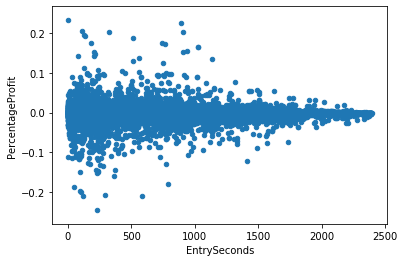

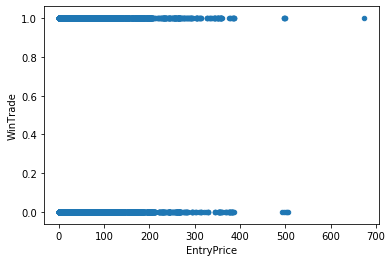

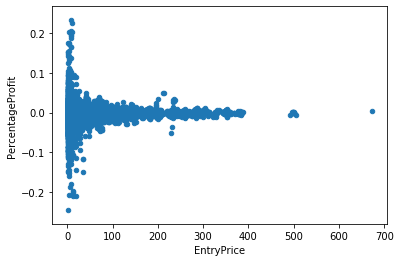

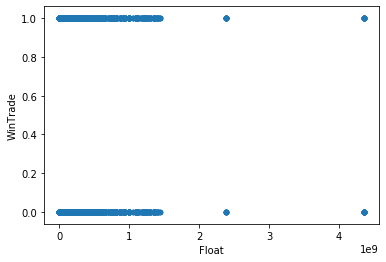

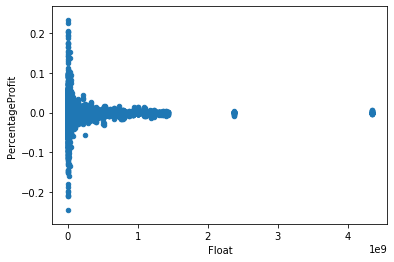

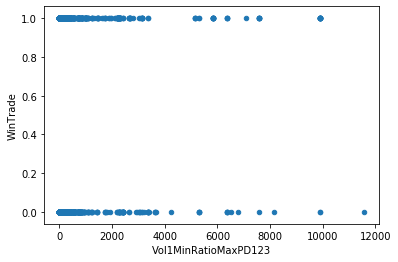

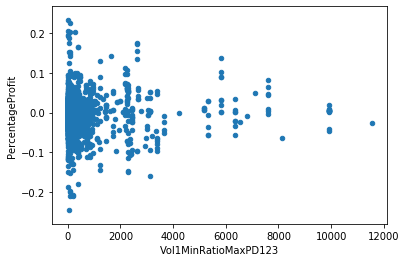

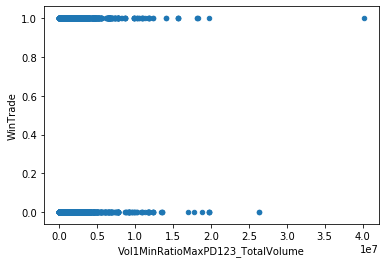

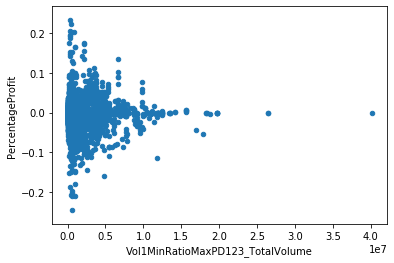

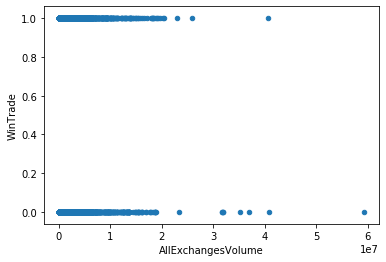

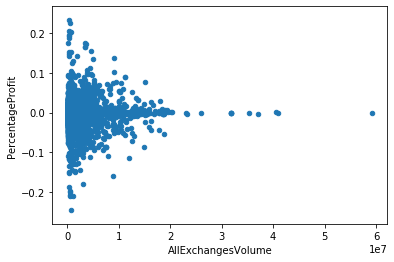

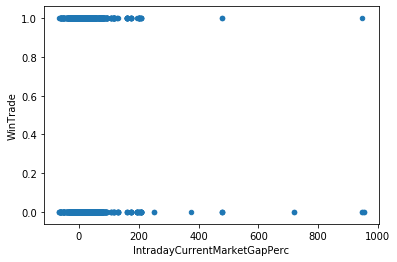

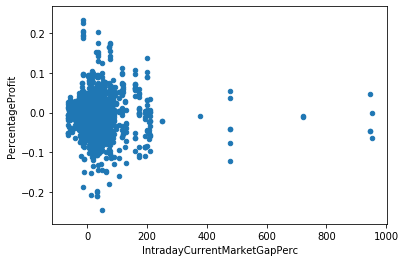

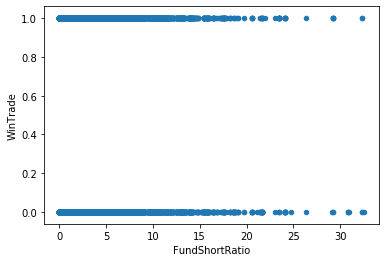

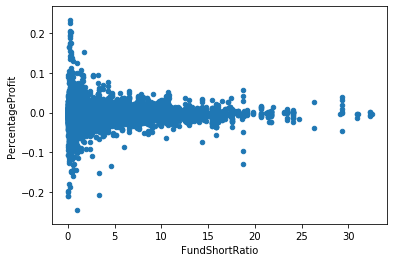

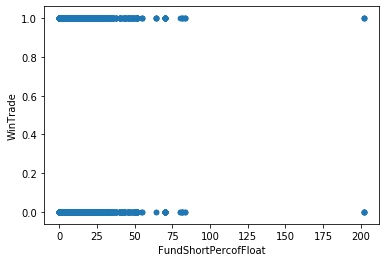

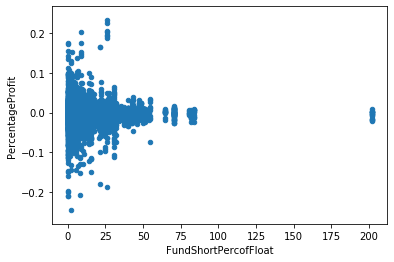

In [10]:
Independent_variables =['EntrySeconds','EntryPrice','Float','Vol1MinRatioMaxPD123','Vol1MinRatioMaxPD123_TotalVolume','AllExchangesVolume','IntradayCurrentMarketGapPerc','FundShortRatio','FundShortPercofFloat']

Dependent_variables =['WinTrade','PercentageProfit']

#df.plot(kind="scatter", x="Float", y="WinTrade")

for i in Independent_variables:
    for j in Dependent_variables:
        Trade.plot(kind="scatter", x= i, y= j)

In [11]:
sampled_Trade=Trade[Attributes]
print("The dimension of sample_data is:",sampled_Trade.shape)

The dimension of sample_data is: (15217, 11)


In [12]:
sampled_Trade.head()

,WinTrade,EntrySeconds,EntryPrice,Float,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,AllExchangesVolume,IntradayCurrentMarketGapPerc,Fund52WeekChange,FundShortRatio,FundShortPercofFloat
0,0,9.163,38.52,823380000,4.1,536443,536443,3.257066,-4.67%,1.97,2.39
1,1,32.123,23.22,11730000,60.7,387548,387548,22.171946,∞%,6.13,21.35
2,0,74.277,38.35,823380000,10.6,722384,750449,3.257066,-4.67%,1.97,2.39
3,0,82.502,38.33,823380000,10.6,722384,770402,3.257066,-4.67%,1.97,2.39
4,0,30.164,38.37,823380000,7.5,634739,634739,3.257066,-4.67%,1.97,2.39


In [13]:
#----------Number_of_categorical_variables_and_numeric_variables----------

categorical_variables=[]
numeric_variables=[]

for feature in sampled_Trade.columns:
    if sampled_Trade[feature].dtype == 'object':
        categorical_variables.append(feature)
    else:
        numeric_variables.append(feature)
        
print("The categorical_variables are: ",categorical_variables)
print()
print("The numeric variables are: ",numeric_variables)


temp_vect=[]
for value in sampled_Trade['Fund52WeekChange']:
    if value == '∞%':
        temp_vect.append(0)
    else:
        temp_vect.append(float(value.split('%')[0]))
    
sampled_Trade['Fund52WeekChange'] = temp_vect

The categorical_variables are:  ['Fund52WeekChange']

The numeric variables are:  ['WinTrade', 'EntrySeconds', 'EntryPrice', 'Float', 'Vol1MinRatioMaxPD123', 'Vol1MinRatioMaxPD123_TotalVolume', 'AllExchangesVolume', 'IntradayCurrentMarketGapPerc', 'FundShortRatio', 'FundShortPercofFloat']


Text(0.5, 1, 'Trade_1')

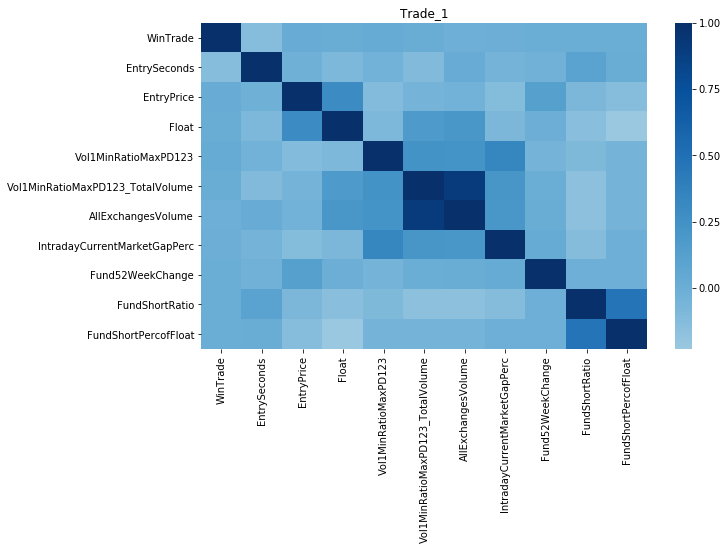

In [14]:

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(sampled_Trade.corr(), center=0, cmap='Blues')
ax.set_title('Trade_1')

In [15]:
#Train the Data
X=sampled_Trade.drop("WinTrade",axis=1)
y=sampled_Trade['WinTrade']

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.4,random_state=1)

logmodel=LogisticRegression()

logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
prediction=logmodel.predict(X_test)

from sklearn.metrics import classification_report

classification_report(y_test,prediction)

'             precision    recall  f1-score   support\n\n          0       0.56      0.58      0.57      3166\n          1       0.52      0.50      0.51      2921\n\navg / total       0.54      0.54      0.54      6087\n'

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[1836, 1330],
       [1459, 1462]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.5418104156398883

In [19]:

#Features which are important
logmodel.fit(X_train/np.std(X_train,0), y_train)
print(logmodel.coef_)

[[-0.28518362  0.06429171 -0.00055945  0.08494972  0.10293114 -0.11117995
  -0.06003149 -0.00316131  0.07369796 -0.00686484]]


In [20]:
#PCA Analysis
X=sampled_Trade.drop("WinTrade",axis=1)
y=sampled_Trade['WinTrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_ 

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.49860358140299

In [23]:
print( abs( pca.components_))

[[0.09005674 0.00821754 0.22160259 0.27679503 0.58069151 0.57822689
  0.25411519 0.00731471 0.29668329 0.20469753]
 [0.07356431 0.47534202 0.45469781 0.28894385 0.14524212 0.13605942
  0.28011574 0.11031481 0.35694029 0.46984211]]


In [24]:
#Random Forest Regressor
X=sampled_Trade.drop('WinTrade',axis=1)
y=sampled_Trade['WinTrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [25]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7082306554953179


In [26]:
#Print the name and gini importance of each feature
for feature in zip(sampled_Trade,clf.feature_importances_):
    print(feature)


('WinTrade', 0.1692582184457191)
('EntrySeconds', 0.13171924264247742)
('EntryPrice', 0.07137540794246272)
('Float', 0.10166175200778545)
('Vol1MinRatioMaxPD123', 0.09694665468211561)
('Vol1MinRatioMaxPD123_TotalVolume', 0.1278047029989096)
('AllExchangesVolume', 0.09807935928028037)
('IntradayCurrentMarketGapPerc', 0.07067502865327757)
('Fund52WeekChange', 0.0708445066305437)
('FundShortRatio', 0.06163512671642826)


In [27]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [28]:
X=sampled_Trade.drop('WinTrade',axis=1)
y=sampled_Trade['WinTrade']

#Split dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

#Building a Decision Tree model
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [29]:
#Model Accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6844093970757352


In [30]:
#Feature Importance in Decision Tree Model
print(clf.feature_importances_)

[0.20379207 0.14394574 0.059313   0.09204769 0.08618611 0.14040829
 0.08211487 0.06748995 0.07506596 0.0496363 ]


In [31]:
#Naive Bayes
X=sampled_Trade.drop('WinTrade',axis=1)
y=sampled_Trade['WinTrade']

#Split dataset into training and test dataset
from sklearn.cross_validation import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=109)

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [32]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.48496796451453916


In [33]:
#Print the name and the features which are important
for feature in zip(sampled_Trade,clf.feature_importances_):
    print(feature)

('WinTrade', 0.2037920743557993)
('EntrySeconds', 0.14394574100362773)
('EntryPrice', 0.059312999324806125)
('Float', 0.09204768956079112)
('Vol1MinRatioMaxPD123', 0.08618611360020775)
('Vol1MinRatioMaxPD123_TotalVolume', 0.1404082914061681)
('AllExchangesVolume', 0.0821148742989)
('IntradayCurrentMarketGapPerc', 0.06748995026525288)
('Fund52WeekChange', 0.07506596138217077)
('FundShortRatio', 0.049636304802276196)


In [34]:
#Bagged Decision Trees for classification
X=sampled_Trade.drop('WinTrade',axis=1)
y=sampled_Trade['WinTrade']

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4= DecisionTreeClassifier(random_state=1)

print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes','Decision Tree']

for clf, label in zip([clf1, clf2, clf3, clf4], labels):
    
    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.54 (+/- 0.01) [Logistic Regression]
Accuracy: 0.53 (+/- 0.01) [Random Forest]
Accuracy: 0.49 (+/- 0.02) [Naive Bayes]
Accuracy: 0.52 (+/- 0.01) [Decision Tree]


In [35]:
#Confusion Matrix
from sklearn.metrics import classification_report

classification_report(y_test,prediction)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[1719, 1462],
       [1576, 1330]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.5009035649745359

In [37]:
sampled_Trade.drop(['EntryPrice','Vol1MinRatioMaxPD123','AllExchangesVolume','IntradayCurrentMarketGapPerc','FundShortRatio','FundShortPercofFloat','Fund52WeekChange'], axis=1)

,WinTrade,EntrySeconds,Float,Vol1MinRatioMaxPD123_TotalVolume
0,0,9.163,823380000,536443
1,1,32.123,11730000,387548
2,0,74.277,823380000,722384
3,0,82.502,823380000,722384
4,0,30.164,823380000,634739
...,...,...,...,...
15212,0,936.870,931290000,60214
15213,0,2309.390,44830000,65815
15214,0,2324.160,277450000,68210
15215,0,2157.226,44320000,94073


In [38]:
#Train the Data
X1=sampled_Trade.drop("WinTrade",axis=1)
y1=sampled_Trade['WinTrade']

from sklearn.cross_validation import train_test_split

X1_train, X1_test, y1_train, y1_test= train_test_split(X1, y1, test_size=0.3,random_state=1)

logmodel=LogisticRegression()

logmodel.fit(X1_train,y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
prediction=logmodel.predict(X1_test)

from sklearn.metrics import classification_report

classification_report(y1_test,prediction)

'             precision    recall  f1-score   support\n\n          0       0.56      0.79      0.65      2421\n          1       0.55      0.28      0.37      2145\n\navg / total       0.55      0.55      0.52      4566\n'

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test,prediction)

array([[1922,  499],
       [1539,  606]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test,prediction)

0.5536574682435392

In [42]:
X1=sampled_Trade.drop('WinTrade',axis=1)
y1=sampled_Trade['WinTrade']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X1_train,y1_train)

y_pred=clf.predict(X1_test)

In [43]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5032035485460818


In [44]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [45]:
X1=sampled_Trade.drop('WinTrade',axis=1)
y1=sampled_Trade['WinTrade']

#Split dataset into training and test dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=1)

#Building a Decision Tree model
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X1_train,y1_train)

#Predict the response for test dataset
y1_pred = clf.predict(X1_test)

In [46]:
#Model Accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.6796451453918186


In [47]:
X1=sampled_Trade.drop('WinTrade',axis=1)
y1=sampled_Trade['WinTrade']

#Split dataset into training and test dataset
from sklearn.cross_validation import train_test_split

# Split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4,random_state=109)

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X1_train, y1_train)

#Predict the response for test dataset
y1_pred = gnb.predict(X1_test)

In [48]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.48496796451453916


In [49]:
sampled_Trade.drop(['EntryPrice','Vol1MinRatioMaxPD123','Float','AllExchangesVolume','IntradayCurrentMarketGapPerc','FundShortRatio','FundShortPercofFloat','Fund52WeekChange'], axis=1)

,WinTrade,EntrySeconds,Vol1MinRatioMaxPD123_TotalVolume
0,0,9.163,536443
1,1,32.123,387548
2,0,74.277,722384
3,0,82.502,722384
4,0,30.164,634739
...,...,...,...
15212,0,936.870,60214
15213,0,2309.390,65815
15214,0,2324.160,68210
15215,0,2157.226,94073


In [50]:
# Initialize neural network object and fit object for optimization 
import mlrose
nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                 algorithm = 'gradient_descent', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)

nn_model2.fit(X1_train, y1_train)

# Predict labels for train set and assess accuracy
y1_train_pred = nn_model2.predict(X1_train)

y1_train_accuracy = accuracy_score(y1_train, y1_train_pred)

print(y1_train_accuracy)
0.625

# Predict labels for test set and assess accuracy
y1_test_pred = nn_model2.predict(X1_test)

y1_test_accuracy = accuracy_score(y1_test, y1_test_pred)

print(y1_test_accuracy)

0.5209200438116101
0.5225891243633974
